### Importaciones y lecturas

In [2]:
import pandas as pd
import numpy as np
from collections import Counter
from itertools import chain
import shutil
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dfAll = pd.read_csv('/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Tablas/dfAll.csv')

clientes_malos = pd.read_csv('/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Tablas/class_ID_malo.csv')
clientes_regulares = pd.read_csv('/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Tablas/class_ID_regulares.csv')
clientes_vip = pd.read_csv('/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Tablas/class_ID_vip.csv')

### Preparacion de datos

#### Limpieza de data frame total y listas de clientes

In [4]:
# Se eliminan duplicados,  STATUS (ver 1_data_cleaning.ipynb ) balance del mes 

dfAll_m = dfAll.drop_duplicates( subset= ['ID'] , keep='first')
dfAll_m = dfAll_m.drop(['Unnamed: 0','STATUS', 'MONTHS_BALANCE'], axis = 1)
dfAll_m.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.89,12.44,1,1,0,0,NaN,2.0
16,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.89,12.44,1,1,0,0,NaN,2.0
31,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.83,3.11,1,0,0,0,Security staff,2.0
61,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.36,8.36,1,0,1,1,Sales staff,1.0
66,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.36,8.36,1,0,1,1,Sales staff,1.0


In [5]:
dfAll_m['YEARS_EMPLOYED'].describe(), dfAll_m['YEARS_BIRTH'].describe()

(count    36457.000000
 mean      -162.364823
 std        377.128577
 min      -1000.670000
 25%          1.120000
 50%          4.250000
 75%          8.640000
 max         43.050000
 Name: YEARS_EMPLOYED, dtype: float64,
 count    36457.000000
 mean        43.767611
 std         11.508341
 min         20.520000
 25%         34.140000
 50%         42.640000
 75%         53.250000
 max         68.910000
 Name: YEARS_BIRTH, dtype: float64)

In [6]:
dfAll_m.shape

(36457, 18)

In [7]:
clientes_malos['0']

0      5018501
1      5021431
2      5038807
3      5053254
4      5061360
        ...   
106    5058531
107    5117794
108    5058532
109    5137206
110    5090214
Name: 0, Length: 111, dtype: int64

#### Crear data frame de clientes malo, regular y vip

In [8]:
# clientes_malos.reset_index(level=None, drop=True , inplace=False)
# clientes_regulares.reset_index(level=None, drop=True , inplace=False)
# clientes_vip.reset_index(level=None, drop=True , inplace=False)

# dfAll_m.reset_index(level=None, drop=True , inplace=False)

In [9]:
# Listas de clientes y reseteo de index

df_clientes_malos = dfAll_m.set_index('ID').loc[clientes_malos['0']].reset_index(inplace=False)
df_clientes_regulares = dfAll_m.set_index('ID').loc[clientes_regulares['0']].reset_index(inplace=False)
df_clientes_vip = dfAll_m.set_index('ID').loc[clientes_vip['0']].reset_index(inplace=False)

In [10]:
df_clientes_malos

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5018501,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,51.92,2.75,1,1,1,0,Cooking staff,2.0
1,5021431,F,N,Y,0,126000.0,Commercial associate,Higher education,Single / not married,House / apartment,51.80,6.77,1,0,0,0,Sales staff,1.0
2,5038807,M,Y,Y,0,202500.0,Commercial associate,Higher education,Married,House / apartment,34.68,14.72,1,0,0,1,Laborers,2.0
3,5053254,F,Y,Y,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,51.14,5.89,1,1,0,0,Managers,2.0
4,5061360,M,N,Y,0,65250.0,Pensioner,Higher education,Married,House / apartment,57.18,-1000.67,1,0,0,0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,5058531,M,N,N,0,391500.0,Working,Secondary / secondary special,Single / not married,Municipal apartment,25.32,1.39,1,0,0,0,Sales staff,1.0
107,5117794,F,Y,N,2,162000.0,Commercial associate,Incomplete higher,Married,House / apartment,26.47,2.18,1,1,1,0,Core staff,4.0
108,5058532,M,N,N,0,391500.0,Working,Secondary / secondary special,Single / not married,Municipal apartment,25.32,1.39,1,0,0,0,Sales staff,1.0
109,5137206,M,N,N,0,90000.0,Working,Secondary / secondary special,Single / not married,With parents,27.12,0.47,1,1,0,0,Drivers,1.0


In [11]:
df_clientes_malos.shape , df_clientes_regulares.shape , df_clientes_vip.shape

((111, 18), (14757, 18), (10539, 18))

In [12]:
# Para YEARS_EMPLOYED, se seleccionaron solamente los datos positivos, 
# dejando fuera a los jubilados debido a las inconsistencias entre los registros

df_clientes_malos= df_clientes_malos.drop(df_clientes_malos.index[df_clientes_malos['YEARS_EMPLOYED']<0])
df_clientes_regulares= df_clientes_regulares.drop(df_clientes_regulares.index[df_clientes_regulares['YEARS_EMPLOYED']<0])
df_clientes_vip= df_clientes_vip.drop(df_clientes_vip.index[df_clientes_vip['YEARS_EMPLOYED']<0])

In [13]:
df_clientes_malos.shape , df_clientes_regulares.shape , df_clientes_vip.shape

((96, 18), (12258, 18), (8803, 18))

#### Limpieza data frame clientes malo, regular y vip

In [14]:
# Se elimina ID en la correlacion para evitar valores incongruentes 

# dfAll_m = dfAll_m.dropna()

df_clientes_malos = df_clientes_malos.drop(['ID'], axis = 1)
df_clientes_regulares = df_clientes_regulares.drop(['ID'], axis = 1)
df_clientes_vip = df_clientes_vip.drop(['ID'], axis = 1)

# Se eliminan valores vacíos en 

df_clientes_malos = df_clientes_malos.dropna()
df_clientes_regulares = df_clientes_regulares.dropna()
df_clientes_vip = df_clientes_vip.dropna()

df_clientes_malos_str = df_clientes_malos
df_clientes_regulares_str = df_clientes_regulares
df_clientes_vip_str = df_clientes_vip

In [15]:
df_clientes_malos

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,51.92,2.75,1,1,1,0,Cooking staff,2.0
1,F,N,Y,0,126000.0,Commercial associate,Higher education,Single / not married,House / apartment,51.80,6.77,1,0,0,0,Sales staff,1.0
2,M,Y,Y,0,202500.0,Commercial associate,Higher education,Married,House / apartment,34.68,14.72,1,0,0,1,Laborers,2.0
3,F,Y,Y,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,51.14,5.89,1,1,0,0,Managers,2.0
5,F,N,Y,1,157500.0,State servant,Higher education,Married,House / apartment,42.86,11.73,1,0,0,0,Core staff,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,M,N,N,0,391500.0,Working,Secondary / secondary special,Single / not married,Municipal apartment,25.32,1.39,1,0,0,0,Sales staff,1.0
107,F,Y,N,2,162000.0,Commercial associate,Incomplete higher,Married,House / apartment,26.47,2.18,1,1,1,0,Core staff,4.0
108,M,N,N,0,391500.0,Working,Secondary / secondary special,Single / not married,Municipal apartment,25.32,1.39,1,0,0,0,Sales staff,1.0
109,M,N,N,0,90000.0,Working,Secondary / secondary special,Single / not married,With parents,27.12,0.47,1,1,0,0,Drivers,1.0


In [16]:
df_clientes_vip

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
2,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.36,8.36,1,0,1,1,Sales staff,1.0
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.36,8.36,1,0,1,1,Sales staff,1.0
4,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,29.23,3.02,1,0,0,0,Accountants,2.0
5,F,N,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,27.48,4.02,1,0,1,0,Laborers,2.0
6,F,N,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,27.48,4.02,1,0,1,0,Laborers,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10528,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,33.94,3.63,1,0,1,1,Medicine staff,2.0
10529,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,43.67,15.97,1,0,0,0,Managers,2.0
10533,F,N,Y,0,247500.0,Working,Higher education,Married,House / apartment,60.55,1.58,1,0,0,1,Managers,2.0
10534,F,N,Y,0,202500.0,Working,Secondary / secondary special,Separated,House / apartment,38.14,2.48,1,0,0,0,Core staff,1.0


In [17]:
# Se hace la primer correlación
# Se eliminan automáticamente valores con string

s_clientes_malos = df_clientes_malos.corr()
s_clientes_regulares = df_clientes_regulares.corr()
s_clientes_vip = df_clientes_vip.corr()

In [18]:
s_clientes_malos

,CNT_CHILDREN,AMT_INCOME_TOTAL,YEARS_BIRTH,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
CNT_CHILDREN,1.000000,0.100234,-0.297224,-0.130159,NaN,0.184868,0.368375,0.044766,0.845809
AMT_INCOME_TOTAL,0.100234,1.000000,-0.064819,-0.166888,NaN,-0.311802,-0.104082,0.093540,-0.062004
YEARS_BIRTH,-0.297224,-0.064819,1.000000,0.201707,NaN,-0.060275,-0.078016,-0.269351,-0.208046
YEARS_EMPLOYED,-0.130159,-0.166888,0.201707,1.000000,NaN,-0.077283,-0.158536,-0.112366,-0.005913
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,0.184868,-0.311802,-0.060275,-0.077283,NaN,1.000000,0.463980,-0.190076,0.165239
FLAG_PHONE,0.368375,-0.104082,-0.078016,-0.158536,NaN,0.463980,1.000000,0.112354,0.328783
FLAG_EMAIL,0.044766,0.093540,-0.269351,-0.112366,NaN,-0.190076,0.112354,1.000000,0.043848
CNT_FAM_MEMBERS,0.845809,-0.062004,-0.208046,-0.005913,NaN,0.165239,0.328783,0.043848,1.000000


'/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Mobil_Clientes_malos.png'

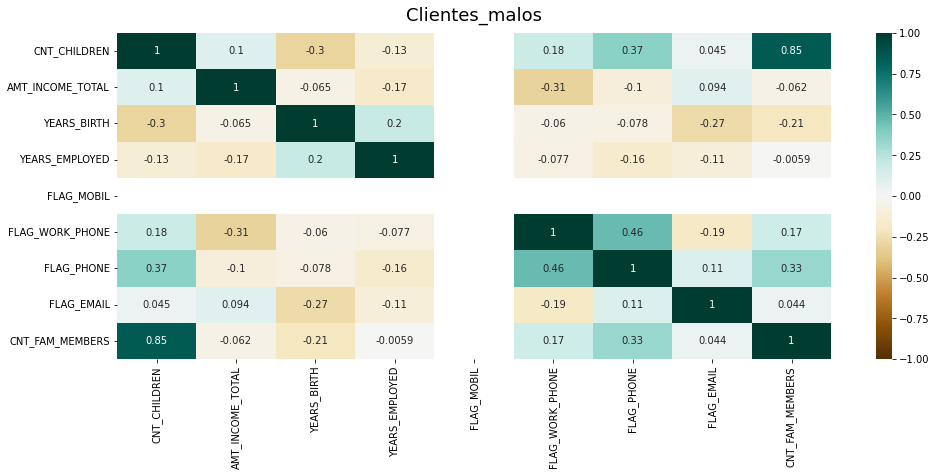

In [19]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(s_clientes_malos, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Clientes_malos', fontdict={'fontsize':18}, pad=12)

plt.savefig('Mobil_Clientes_malos.png', dpi=300, bbox_inches='tight')
pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Mobil_Clientes_malos.png'
pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Mobil_Clientes_malos.png'

shutil.move(pos1,pos2)

In [20]:
# Se elimina Flag Mobil por inconsistencia

df_clientes_malos_1 = df_clientes_malos.drop(['FLAG_MOBIL'], axis = 1)
df_clientes_regulares_1 = df_clientes_regulares.drop(['FLAG_MOBIL'], axis = 1)
df_clientes_vip_1 = df_clientes_vip.drop(['FLAG_MOBIL'], axis = 1)

s_clientes_malos_1 = df_clientes_malos_1.corr()
s_clientes_regulares_1 = df_clientes_regulares_1.corr()
s_clientes_vip_1 = df_clientes_vip_1.corr()

'/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/corr/Clientes_malos.png'

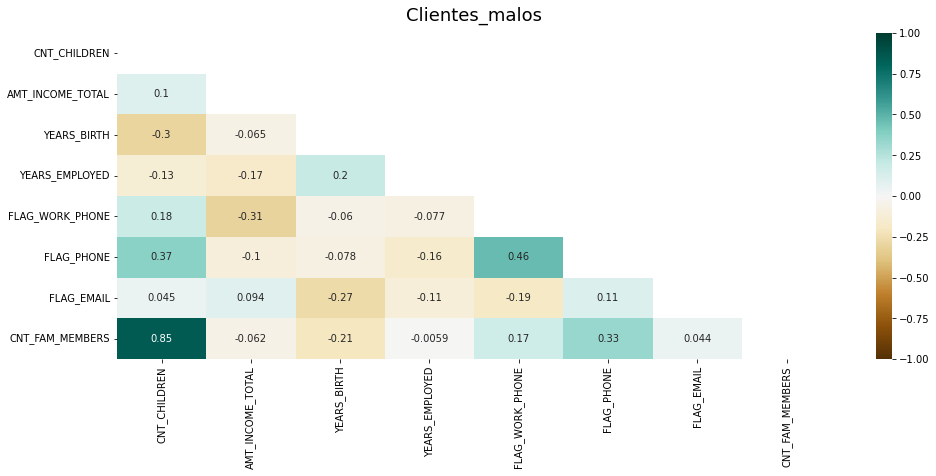

In [21]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(s_clientes_malos_1, dtype=bool))
heatmap = sns.heatmap(s_clientes_malos_1, mask= mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Clientes_malos', fontdict={'fontsize':18}, pad=12);

plt.savefig('Clientes_malos.png', dpi=300, bbox_inches='tight')
pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Clientes_malos.png'
pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/corr/Clientes_malos.png'
shutil.move(pos1,pos2)

'/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Corr/Clientes_VIP.png'

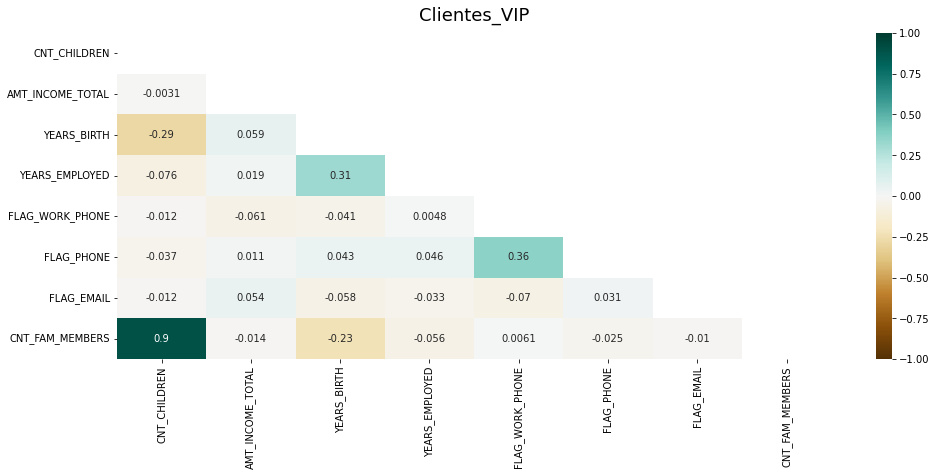

In [22]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(s_clientes_vip_1, dtype=bool))
heatmap = sns.heatmap(s_clientes_vip_1, mask= mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Clientes_VIP', fontdict={'fontsize':18}, pad=12);

plt.savefig('Clientes_VIP.png', dpi=300, bbox_inches='tight')
pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Clientes_VIP.png'
pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Corr/Clientes_VIP.png'
shutil.move(pos1,pos2)

'/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Corr/Clientes_regulares.png'

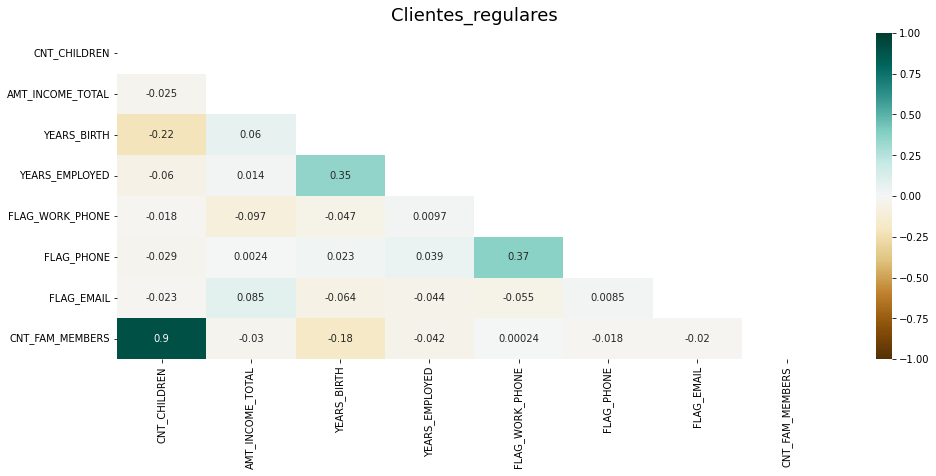

In [23]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(s_clientes_regulares_1, dtype=bool))
heatmap = sns.heatmap(s_clientes_regulares_1, mask= mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Clientes_regulares', fontdict={'fontsize':18}, pad=12);

plt.savefig('Clientes_regulares.png', dpi=300, bbox_inches='tight')
pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Clientes_regulares.png'
pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Corr/Clientes_regulares.png'
shutil.move(pos1,pos2)


'/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Corr/Correlación_AMT_INCOME_TOTAL_VIP.png'

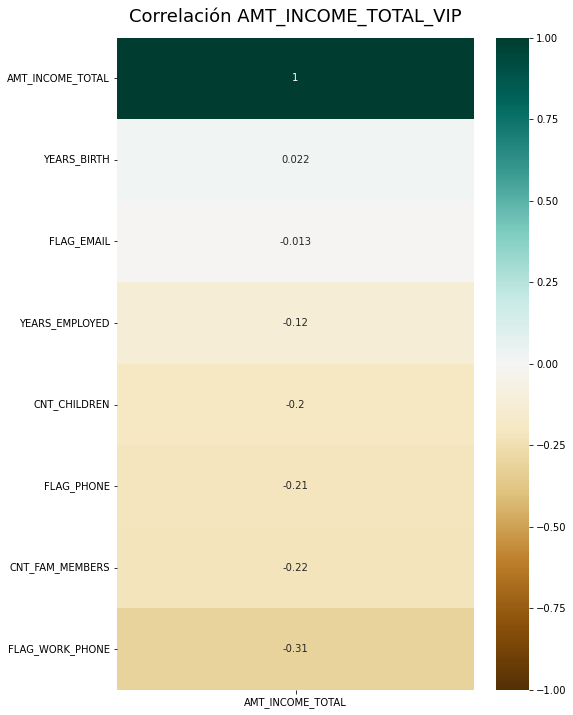

In [24]:
# Correlación por ingresos sin strings

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(s_clientes_vip_1.corr()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación AMT_INCOME_TOTAL_VIP', fontdict={'fontsize':18}, pad=16)

plt.savefig('Correlación_AMT_INCOME_TOTAL_VIP.png', dpi=300, bbox_inches='tight')
pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Correlación_AMT_INCOME_TOTAL_VIP.png'
pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Corr/Correlación_AMT_INCOME_TOTAL_VIP.png'
shutil.move(pos1,pos2)

'/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Corr/Correlación_AMT_INCOME_TOTAL_malos.png'

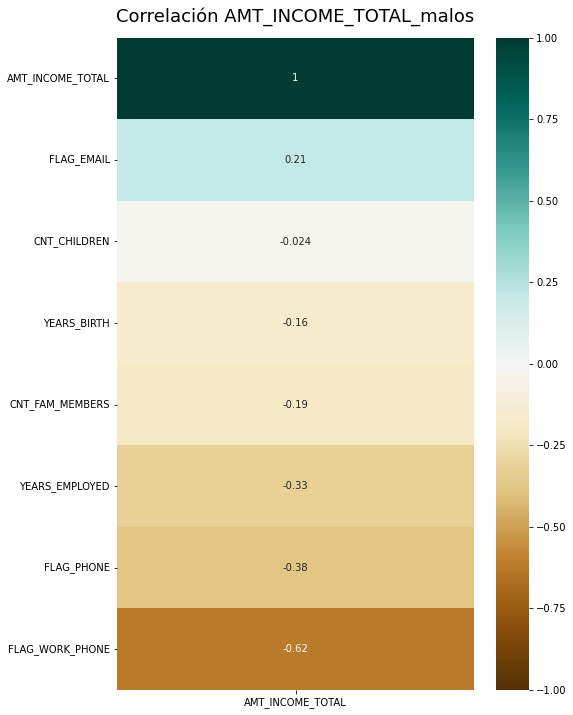

In [25]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(s_clientes_malos_1.corr()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación AMT_INCOME_TOTAL_malos', fontdict={'fontsize':18}, pad=16);

plt.savefig('Correlación_AMT_INCOME_TOTAL_malos.png', dpi=300, bbox_inches='tight')
pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Correlación_AMT_INCOME_TOTAL_malos.png'
pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Corr/Correlación_AMT_INCOME_TOTAL_malos.png'
shutil.move(pos1,pos2)

In [26]:
# # Se eliminan valores nulos de OCCUPATION_TYPE
# df_clientes_malos_str = df_clientes_malos_str.dropna()
# df_clientes_regulares_str = df_clientes_regulares_str.dropna()
# df_clientes_vip_str = df_clientes_vip_str.dropna()

In [27]:
df_clientes_malos_str

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,51.92,2.75,1,1,1,0,Cooking staff,2.0
1,F,N,Y,0,126000.0,Commercial associate,Higher education,Single / not married,House / apartment,51.80,6.77,1,0,0,0,Sales staff,1.0
2,M,Y,Y,0,202500.0,Commercial associate,Higher education,Married,House / apartment,34.68,14.72,1,0,0,1,Laborers,2.0
3,F,Y,Y,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,51.14,5.89,1,1,0,0,Managers,2.0
5,F,N,Y,1,157500.0,State servant,Higher education,Married,House / apartment,42.86,11.73,1,0,0,0,Core staff,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,M,N,N,0,391500.0,Working,Secondary / secondary special,Single / not married,Municipal apartment,25.32,1.39,1,0,0,0,Sales staff,1.0
107,F,Y,N,2,162000.0,Commercial associate,Incomplete higher,Married,House / apartment,26.47,2.18,1,1,1,0,Core staff,4.0
108,M,N,N,0,391500.0,Working,Secondary / secondary special,Single / not married,Municipal apartment,25.32,1.39,1,0,0,0,Sales staff,1.0
109,M,N,N,0,90000.0,Working,Secondary / secondary special,Single / not married,With parents,27.12,0.47,1,1,0,0,Drivers,1.0


In [28]:
df_clientes_malos_str['YEARS_EMPLOYED']

0       2.75
1       6.77
2      14.72
3       5.89
5      11.73
       ...  
106     1.39
107     2.18
108     1.39
109     0.47
110     0.59
Name: YEARS_EMPLOYED, Length: 83, dtype: float64

In [29]:

# Se dan valores de Code Gender: M = 0 y 1 = F

for idx, row in df_clientes_malos_str.iterrows():
    if  df_clientes_malos_str.loc[idx,'CODE_GENDER'] == 'M':
        df_clientes_malos_str.loc[idx,'CODE_GENDER'] = 0
    if  df_clientes_malos_str.loc[idx,'CODE_GENDER'] == 'F':
        df_clientes_malos_str.loc[idx,'CODE_GENDER'] = 1

for idx, row in df_clientes_regulares_str.iterrows():
    if  df_clientes_regulares_str.loc[idx,'CODE_GENDER'] == 'M':
        df_clientes_regulares_str.loc[idx,'CODE_GENDER'] = 0
    if  df_clientes_regulares_str.loc[idx,'CODE_GENDER'] == 'F':
        df_clientes_regulares_str.loc[idx,'CODE_GENDER'] = 1

for idx, row in df_clientes_vip_str.iterrows():
    if  df_clientes_vip_str.loc[idx,'CODE_GENDER'] == 'M':
        df_clientes_vip_str.loc[idx,'CODE_GENDER'] = 0
    if  df_clientes_vip_str.loc[idx,'CODE_GENDER'] == 'F':
        df_clientes_vip_str.loc[idx,'CODE_GENDER'] = 1

# Se dan valores de FLAG_OWN_CAR 'Y' = 1 y 'N' = 0

for idx, row in df_clientes_malos_str.iterrows():
    if  df_clientes_malos_str.loc[idx,'FLAG_OWN_CAR'] == 'Y':
        df_clientes_malos_str.loc[idx,'FLAG_OWN_CAR'] = 1
    if  df_clientes_malos_str.loc[idx,'FLAG_OWN_CAR'] == 'N':
        df_clientes_malos_str.loc[idx,'FLAG_OWN_CAR'] = 0

for idx, row in df_clientes_regulares_str.iterrows():
    if  df_clientes_regulares_str.loc[idx,'FLAG_OWN_CAR'] == 'Y':
        df_clientes_regulares_str.loc[idx,'FLAG_OWN_CAR'] = 1
    if  df_clientes_regulares_str.loc[idx,'FLAG_OWN_CAR'] == 'N':
        df_clientes_regulares_str.loc[idx,'FLAG_OWN_CAR'] = 0

for idx, row in df_clientes_vip_str.iterrows():
    if  df_clientes_vip_str.loc[idx,'FLAG_OWN_CAR'] == 'Y':
        df_clientes_vip_str.loc[idx,'FLAG_OWN_CAR'] = 1
    if  df_clientes_vip_str.loc[idx,'FLAG_OWN_CAR'] == 'N':
        df_clientes_vip_str.loc[idx,'FLAG_OWN_CAR'] = 0


# FLAG_OWN_REALTY. Y = 1 ; N = 0


for idx, row in df_clientes_malos_str.iterrows():
    if  df_clientes_malos_str.loc[idx,'FLAG_OWN_REALTY'] == 'Y':
        df_clientes_malos_str.loc[idx,'FLAG_OWN_REALTY'] = 1
    if  df_clientes_malos_str.loc[idx,'FLAG_OWN_REALTY'] == 'N':
        df_clientes_malos_str.loc[idx,'FLAG_OWN_REALTY'] = 0

for idx, row in df_clientes_regulares_str.iterrows():
    if  df_clientes_regulares_str.loc[idx,'FLAG_OWN_REALTY'] == 'Y':
        df_clientes_regulares_str.loc[idx,'FLAG_OWN_REALTY'] = 1
    if  df_clientes_regulares_str.loc[idx,'FLAG_OWN_REALTY'] == 'N':
        df_clientes_regulares_str.loc[idx,'FLAG_OWN_REALTY'] = 0

for idx, row in df_clientes_vip_str.iterrows():
    if  df_clientes_vip_str.loc[idx,'FLAG_OWN_REALTY'] == 'Y':
        df_clientes_vip_str.loc[idx,'FLAG_OWN_REALTY'] = 1
    if  df_clientes_vip_str.loc[idx,'FLAG_OWN_REALTY'] == 'N':
        df_clientes_vip_str.loc[idx,'FLAG_OWN_REALTY'] = 0


# Se dan valores de NAME_INCOME_TYPE 'Working' 1,  'Commercial associate' 2, 'Pensioner' 3 , 'State servant' 4 , 'Student' 5

for idx, row in df_clientes_malos_str.iterrows():
    if  df_clientes_malos_str.loc[idx,'NAME_INCOME_TYPE'] == 'Working':
        df_clientes_malos_str.loc[idx,'NAME_INCOME_TYPE'] = 1
    if  df_clientes_malos_str.loc[idx,'NAME_INCOME_TYPE'] == 'Commercial associate':
        df_clientes_malos_str.loc[idx,'NAME_INCOME_TYPE'] = 2
    if  df_clientes_malos_str.loc[idx,'NAME_INCOME_TYPE'] == 'Pensioner':
        df_clientes_malos_str.loc[idx,'NAME_INCOME_TYPE'] = 3
    if  df_clientes_malos_str.loc[idx,'NAME_INCOME_TYPE'] == 'State servant':
        df_clientes_malos_str.loc[idx,'NAME_INCOME_TYPE'] = 4
    if  df_clientes_malos_str.loc[idx,'NAME_INCOME_TYPE'] == 'Student':
        df_clientes_malos_str.loc[idx,'NAME_INCOME_TYPE'] = 5


for idx, row in df_clientes_regulares_str.iterrows():
    if  df_clientes_regulares_str.loc[idx,'NAME_INCOME_TYPE'] == 'Working':
        df_clientes_regulares_str.loc[idx,'NAME_INCOME_TYPE'] = 1
    if  df_clientes_regulares_str.loc[idx,'NAME_INCOME_TYPE'] == 'Commercial associate':
        df_clientes_regulares_str.loc[idx,'NAME_INCOME_TYPE'] = 2
    if  df_clientes_regulares_str.loc[idx,'NAME_INCOME_TYPE'] == 'Pensioner':
        df_clientes_regulares_str.loc[idx,'NAME_INCOME_TYPE'] = 3
    if  df_clientes_regulares_str.loc[idx,'NAME_INCOME_TYPE'] == 'State servant':
        df_clientes_regulares_str.loc[idx,'NAME_INCOME_TYPE'] = 4
    if  df_clientes_regulares_str.loc[idx,'NAME_INCOME_TYPE'] == 'Student':
        df_clientes_regulares_str.loc[idx,'NAME_INCOME_TYPE'] = 5


for idx, row in df_clientes_vip_str.iterrows():
    if  df_clientes_vip_str.loc[idx,'NAME_INCOME_TYPE'] == 'Working':
        df_clientes_vip_str.loc[idx,'NAME_INCOME_TYPE'] = 1
    if  df_clientes_vip_str.loc[idx,'NAME_INCOME_TYPE'] == 'Commercial associate':
        df_clientes_vip_str.loc[idx,'NAME_INCOME_TYPE'] = 2
    if  df_clientes_vip_str.loc[idx,'NAME_INCOME_TYPE'] == 'Pensioner':
        df_clientes_vip_str.loc[idx,'NAME_INCOME_TYPE'] = 3
    if  df_clientes_vip_str.loc[idx,'NAME_INCOME_TYPE'] == 'State servant':
        df_clientes_vip_str.loc[idx,'NAME_INCOME_TYPE'] = 4
    if  df_clientes_vip_str.loc[idx,'NAME_INCOME_TYPE'] == 'Student':
        df_clientes_vip_str.loc[idx,'NAME_INCOME_TYPE'] = 5

# NAME_EDUCATION_TYPE 'Higher education' = 1 , 'Secondary / secondary special' = 2 , 'Incomplete higher' =3,
#  'Lower secondary' = 4 , 'Academic degree'= 5

for idx, row in df_clientes_malos_str.iterrows():
    if  df_clientes_malos_str.loc[idx,'NAME_EDUCATION_TYPE'] == 'Higher education':
        df_clientes_malos_str.loc[idx,'NAME_EDUCATION_TYPE'] = 1
    if  df_clientes_malos_str.loc[idx,'NAME_EDUCATION_TYPE'] == 'Secondary / secondary special':
        df_clientes_malos_str.loc[idx,'NAME_EDUCATION_TYPE'] = 2
    if  df_clientes_malos_str.loc[idx,'NAME_EDUCATION_TYPE'] == 'Incomplete higher':
        df_clientes_malos_str.loc[idx,'NAME_EDUCATION_TYPE'] = 3
    if  df_clientes_malos_str.loc[idx,'NAME_EDUCATION_TYPE'] == 'Lower secondary':
        df_clientes_malos_str.loc[idx,'NAME_EDUCATION_TYPE'] = 4
    if  df_clientes_malos_str.loc[idx,'NAME_EDUCATION_TYPE'] == 'Academic degree':
        df_clientes_malos_str.loc[idx,'NAME_EDUCATION_TYPE'] = 5


for idx, row in df_clientes_regulares_str.iterrows():
    if  df_clientes_regulares_str.loc[idx,'NAME_EDUCATION_TYPE'] == 'Higher education':
        df_clientes_regulares_str.loc[idx,'NAME_EDUCATION_TYPE'] = 1
    if  df_clientes_regulares_str.loc[idx,'NAME_EDUCATION_TYPE'] == 'Secondary / secondary special':
        df_clientes_regulares_str.loc[idx,'NAME_EDUCATION_TYPE'] = 2
    if  df_clientes_regulares_str.loc[idx,'NAME_EDUCATION_TYPE'] == 'Incomplete higher':
        df_clientes_regulares_str.loc[idx,'NAME_EDUCATION_TYPE'] = 3
    if  df_clientes_regulares_str.loc[idx,'NAME_EDUCATION_TYPE'] == 'Lower secondary':
        df_clientes_regulares_str.loc[idx,'NAME_EDUCATION_TYPE'] = 4
    if  df_clientes_regulares_str.loc[idx,'NAME_EDUCATION_TYPE'] == 'Academic degree':
        df_clientes_regulares_str.loc[idx,'NAME_EDUCATION_TYPE'] = 5


for idx, row in df_clientes_vip_str.iterrows():
    if  df_clientes_vip_str.loc[idx,'NAME_EDUCATION_TYPE'] == 'Higher education':
        df_clientes_vip_str.loc[idx,'NAME_EDUCATION_TYPE'] = 1
    if  df_clientes_vip_str.loc[idx,'NAME_EDUCATION_TYPE'] == 'Secondary / secondary special':
        df_clientes_vip_str.loc[idx,'NAME_EDUCATION_TYPE'] = 2
    if  df_clientes_vip_str.loc[idx,'NAME_EDUCATION_TYPE'] == 'Incomplete higher':
        df_clientes_vip_str.loc[idx,'NAME_EDUCATION_TYPE'] = 3
    if  df_clientes_vip_str.loc[idx,'NAME_EDUCATION_TYPE'] == 'Lower secondary':
        df_clientes_vip_str.loc[idx,'NAME_EDUCATION_TYPE'] = 4
    if  df_clientes_vip_str.loc[idx,'NAME_EDUCATION_TYPE'] == 'Academic degree':
        df_clientes_vip_str.loc[idx,'NAME_EDUCATION_TYPE'] = 5


# NAME_FAMILY_STATUS Married = 1, Single / not married = 2, Separated = 3, Civil marriage= 4, Widow = 5

for idx, row in df_clientes_malos_str.iterrows():
    if  df_clientes_malos_str.loc[idx,'NAME_FAMILY_STATUS'] == 'Married':
        df_clientes_malos_str.loc[idx,'NAME_FAMILY_STATUS'] = 1
    if  df_clientes_malos_str.loc[idx,'NAME_FAMILY_STATUS'] == 'Single / not married':
        df_clientes_malos_str.loc[idx,'NAME_FAMILY_STATUS'] = 2
    if  df_clientes_malos_str.loc[idx,'NAME_FAMILY_STATUS'] == 'Separated':
        df_clientes_malos_str.loc[idx,'NAME_FAMILY_STATUS'] = 3
    if  df_clientes_malos_str.loc[idx,'NAME_FAMILY_STATUS'] == 'Civil marriage':
        df_clientes_malos_str.loc[idx,'NAME_FAMILY_STATUS'] = 4
    if  df_clientes_malos_str.loc[idx,'NAME_FAMILY_STATUS'] == 'Widow':
        df_clientes_malos_str.loc[idx,'NAME_FAMILY_STATUS'] = 5


for idx, row in df_clientes_regulares_str.iterrows():
    if  df_clientes_regulares_str.loc[idx,'NAME_FAMILY_STATUS'] == 'Married':
        df_clientes_regulares_str.loc[idx,'NAME_FAMILY_STATUS'] = 1
    if  df_clientes_regulares_str.loc[idx,'NAME_FAMILY_STATUS'] == 'Single / not married':
        df_clientes_regulares_str.loc[idx,'NAME_FAMILY_STATUS'] = 2
    if  df_clientes_regulares_str.loc[idx,'NAME_FAMILY_STATUS'] == 'Separated':
        df_clientes_regulares_str.loc[idx,'NAME_FAMILY_STATUS'] = 3
    if  df_clientes_regulares_str.loc[idx,'NAME_FAMILY_STATUS'] == 'Civil marriage':
        df_clientes_regulares_str.loc[idx,'NAME_FAMILY_STATUS'] = 4
    if  df_clientes_regulares_str.loc[idx,'NAME_FAMILY_STATUS'] == 'Widow':
        df_clientes_regulares_str.loc[idx,'NAME_FAMILY_STATUS'] = 5


for idx, row in df_clientes_vip_str.iterrows():
    if  df_clientes_vip_str.loc[idx,'NAME_FAMILY_STATUS'] == 'Married':
        df_clientes_vip_str.loc[idx,'NAME_FAMILY_STATUS'] = 1
    if  df_clientes_vip_str.loc[idx,'NAME_FAMILY_STATUS'] == 'Single / not married':
        df_clientes_vip_str.loc[idx,'NAME_FAMILY_STATUS'] = 2
    if  df_clientes_vip_str.loc[idx,'NAME_FAMILY_STATUS'] == 'Separated':
        df_clientes_vip_str.loc[idx,'NAME_FAMILY_STATUS'] = 3
    if  df_clientes_vip_str.loc[idx,'NAME_FAMILY_STATUS'] == 'Civil marriage':
        df_clientes_vip_str.loc[idx,'NAME_FAMILY_STATUS'] = 4
    if  df_clientes_vip_str.loc[idx,'NAME_FAMILY_STATUS'] == 'Widow':
        df_clientes_vip_str.loc[idx,'NAME_FAMILY_STATUS'] = 5


# NAME_HOUSING_TYPE:  House / apartment = 1, Rented apartment = 2, With parents = 3, Co-op apartment = 4,
# Municipal apartment = 5, Office apartment = 6

for idx, row in df_clientes_malos_str.iterrows():
    if  df_clientes_malos_str.loc[idx,'NAME_HOUSING_TYPE'] == 'House / apartment':
        df_clientes_malos_str.loc[idx,'NAME_HOUSING_TYPE'] = 1
    if  df_clientes_malos_str.loc[idx,'NAME_HOUSING_TYPE'] == 'Rented apartment':
        df_clientes_malos_str.loc[idx,'NAME_HOUSING_TYPE'] = 2
    if  df_clientes_malos_str.loc[idx,'NAME_HOUSING_TYPE'] == 'With parents':
        df_clientes_malos_str.loc[idx,'NAME_HOUSING_TYPE'] = 3
    if  df_clientes_malos_str.loc[idx,'NAME_HOUSING_TYPE'] == 'Co-op apartment':
        df_clientes_malos_str.loc[idx,'NAME_HOUSING_TYPE'] = 4
    if  df_clientes_malos_str.loc[idx,'NAME_HOUSING_TYPE'] == 'Municipal apartment':
        df_clientes_malos_str.loc[idx,'NAME_HOUSING_TYPE'] = 5
    if  df_clientes_malos_str.loc[idx,'NAME_HOUSING_TYPE'] == 'Office apartment':
        df_clientes_malos_str.loc[idx,'NAME_HOUSING_TYPE'] = 6


for idx, row in df_clientes_regulares_str.iterrows():
    if  df_clientes_regulares_str.loc[idx,'NAME_HOUSING_TYPE'] == 'House / apartment':
        df_clientes_regulares_str.loc[idx,'NAME_HOUSING_TYPE'] = 1
    if  df_clientes_regulares_str.loc[idx,'NAME_HOUSING_TYPE'] == 'Rented apartment':
        df_clientes_regulares_str.loc[idx,'NAME_HOUSING_TYPE'] = 2
    if  df_clientes_regulares_str.loc[idx,'NAME_HOUSING_TYPE'] == 'With parents':
        df_clientes_regulares_str.loc[idx,'NAME_HOUSING_TYPE'] = 3
    if  df_clientes_regulares_str.loc[idx,'NAME_HOUSING_TYPE'] == 'Co-op apartment':
        df_clientes_regulares_str.loc[idx,'NAME_HOUSING_TYPE'] = 4
    if  df_clientes_regulares_str.loc[idx,'NAME_HOUSING_TYPE'] == 'Municipal apartment':
        df_clientes_regulares_str.loc[idx,'NAME_HOUSING_TYPE'] = 5
    if  df_clientes_regulares_str.loc[idx,'NAME_HOUSING_TYPE'] == 'Office apartment':
        df_clientes_regulares_str.loc[idx,'NAME_HOUSING_TYPE'] = 6


for idx, row in df_clientes_vip_str.iterrows():
    if  df_clientes_vip_str.loc[idx,'NAME_HOUSING_TYPE'] == 'House / apartment':
        df_clientes_vip_str.loc[idx,'NAME_HOUSING_TYPE'] = 1
    if  df_clientes_vip_str.loc[idx,'NAME_HOUSING_TYPE'] == 'Rented apartment':
        df_clientes_vip_str.loc[idx,'NAME_HOUSING_TYPE'] = 2
    if  df_clientes_vip_str.loc[idx,'NAME_HOUSING_TYPE'] == 'With parents':
        df_clientes_vip_str.loc[idx,'NAME_HOUSING_TYPE'] = 3
    if  df_clientes_vip_str.loc[idx,'NAME_HOUSING_TYPE'] == 'Co-op apartment':
        df_clientes_vip_str.loc[idx,'NAME_HOUSING_TYPE'] = 4
    if  df_clientes_vip_str.loc[idx,'NAME_HOUSING_TYPE'] == 'Municipal apartment':
        df_clientes_vip_str.loc[idx,'NAME_HOUSING_TYPE'] = 5
    if  df_clientes_vip_str.loc[idx,'NAME_HOUSING_TYPE'] == 'Office apartment':
        df_clientes_vip_str.loc[idx,'NAME_HOUSING_TYPE'] = 6


# OCCUPATION_TYPE: Cooking staff = 1, Sales staff = 2, Laborers = 3, Managers =4,
# Core staff = 5, High skill tech staff = 6, Medicine staff = 7, Security staff = 8,
# Drivers = 9, Low-skill Laborers = 10, Accountants = 11, Cleaning staff = 12,
# Secretaries = 13, Waiters/barmen staff = 14, IT staff = 15

for idx, row in df_clientes_malos_str.iterrows():
    if  df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] == 'Cooking staff':
        df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] = 1
    if  df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] == 'Sales staff':
        df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] = 2
    if  df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] == 'Laborers':
        df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] = 3
    if  df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] == 'Managers':
        df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] = 4
    if  df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] == 'Core staff':
        df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] = 5
    if  df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] == 'High skill tech staff':
        df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] = 6
    if  df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] == 'Medicine staff':
        df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] = 7
    if  df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] == 'Security staff':
        df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] = 8
    if  df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] == 'Drivers':
        df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] = 9
    if  df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] == 'Low-skill Laborers':
        df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] = 10
    if  df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] == 'Accountants':
        df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] = 11
    if  df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] == 'Cleaning staff':
        df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] = 12
    if  df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] == 'Secretaries':
        df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] = 13
    if  df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] == 'Waiters/barmen staff':
        df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] = 14
    if  df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] == 'IT staff':
        df_clientes_malos_str.loc[idx,'OCCUPATION_TYPE'] = 15


for idx, row in df_clientes_regulares_str.iterrows():
    if  df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] == 'Cooking staff':
        df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] = 1
    if  df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] == 'Sales staff':
        df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] = 2
    if  df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] == 'Laborers':
        df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] = 3
    if  df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] == 'Managers':
        df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] = 4
    if  df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] == 'Core staff':
        df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] = 5
    if  df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] == 'High skill tech staff':
        df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] = 6
    if  df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] == 'Medicine staff':
        df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] = 7
    if  df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] == 'Security staff':
        df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] = 8
    if  df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] == 'Drivers':
        df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] = 9
    if  df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] == 'Low-skill Laborers':
        df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] = 10
    if  df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] == 'Accountants':
        df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] = 11
    if  df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] == 'Cleaning staff':
        df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] = 12
    if  df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] == 'Secretaries':
        df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] = 13
    if  df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] == 'Waiters/barmen staff':
        df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] = 14
    if  df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] == 'IT staff':
        df_clientes_regulares_str.loc[idx,'OCCUPATION_TYPE'] = 15


for idx, row in df_clientes_vip_str.iterrows():
    if  df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] == 'Cooking staff':
        df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] = 1
    if  df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] == 'Sales staff':
        df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] = 2
    if  df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] == 'Laborers':
        df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] = 3
    if  df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] == 'Managers':
        df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] = 4
    if  df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] == 'Core staff':
        df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] = 5
    if  df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] == 'High skill tech staff':
        df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] = 6
    if  df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] == 'Medicine staff':
        df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] = 7
    if  df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] == 'Security staff':
        df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] = 8
    if  df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] == 'Drivers':
        df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] = 9
    if  df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] == 'Low-skill Laborers':
        df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] = 10
    if  df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] == 'Accountants':
        df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] = 11
    if  df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] == 'Cleaning staff':
        df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] = 12
    if  df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] == 'Secretaries':
        df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] = 13
    if  df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] == 'Waiters/barmen staff':
        df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] = 14
    if  df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] == 'IT staff':
        df_clientes_vip_str.loc[idx,'OCCUPATION_TYPE'] = 15

In [30]:
df_clientes_malos_str['OCCUPATION_TYPE'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype=object)

In [31]:
df_clientes_malos_str['CODE_GENDER']

0      1
1      1
2      0
3      1
5      1
      ..
106    0
107    1
108    0
109    0
110    0
Name: CODE_GENDER, Length: 83, dtype: object

In [32]:
df_clientes_malos_str

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,1,1,1,0,90000.0,1,2,1,1,51.92,2.75,1,1,1,0,1,2.0
1,1,0,1,0,126000.0,2,1,2,1,51.80,6.77,1,0,0,0,2,1.0
2,0,1,1,0,202500.0,2,1,1,1,34.68,14.72,1,0,0,1,3,2.0
3,1,1,1,0,180000.0,2,2,1,1,51.14,5.89,1,1,0,0,4,2.0
5,1,0,1,1,157500.0,4,1,1,1,42.86,11.73,1,0,0,0,5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,0,0,0,391500.0,1,2,2,5,25.32,1.39,1,0,0,0,2,1.0
107,1,1,0,2,162000.0,2,3,1,1,26.47,2.18,1,1,1,0,5,4.0
108,0,0,0,0,391500.0,1,2,2,5,25.32,1.39,1,0,0,0,2,1.0
109,0,0,0,0,90000.0,1,2,2,3,27.12,0.47,1,1,0,0,9,1.0


In [33]:
df_clientes_malos_str = df_clientes_malos_str.drop(['FLAG_MOBIL'], axis = 1)
df_clientes_regulares_str = df_clientes_regulares_str.drop(['FLAG_MOBIL'], axis = 1)
df_clientes_vip_str = df_clientes_vip_str.drop(['FLAG_MOBIL'], axis = 1)

In [34]:
# Se hace la primer correlación
# Se eliminan automáticamente valores con string

df_clientes_malos_str = df_clientes_malos_str.corr()
df_clientes_regulares_str = df_clientes_regulares_str.corr()
df_clientes_vip_str = df_clientes_vip_str.corr()

In [35]:
df_clientes_malos_str

,CNT_CHILDREN,AMT_INCOME_TOTAL,YEARS_BIRTH,YEARS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
CNT_CHILDREN,1.000000,0.100234,-0.297224,-0.130159,0.184868,0.368375,0.044766,0.845809
AMT_INCOME_TOTAL,0.100234,1.000000,-0.064819,-0.166888,-0.311802,-0.104082,0.093540,-0.062004
YEARS_BIRTH,-0.297224,-0.064819,1.000000,0.201707,-0.060275,-0.078016,-0.269351,-0.208046
YEARS_EMPLOYED,-0.130159,-0.166888,0.201707,1.000000,-0.077283,-0.158536,-0.112366,-0.005913
FLAG_WORK_PHONE,0.184868,-0.311802,-0.060275,-0.077283,1.000000,0.463980,-0.190076,0.165239
FLAG_PHONE,0.368375,-0.104082,-0.078016,-0.158536,0.463980,1.000000,0.112354,0.328783
FLAG_EMAIL,0.044766,0.093540,-0.269351,-0.112366,-0.190076,0.112354,1.000000,0.043848
CNT_FAM_MEMBERS,0.845809,-0.062004,-0.208046,-0.005913,0.165239,0.328783,0.043848,1.000000


/var/folders/v1/3g8467xs4vvf3w4gs3sqq6qr0000gn/T/ipykernel_13510/1316748361.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_clientes_malos_str, dtype=np.bool))


'/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/corr_rel/Clientes_malos_all.png'

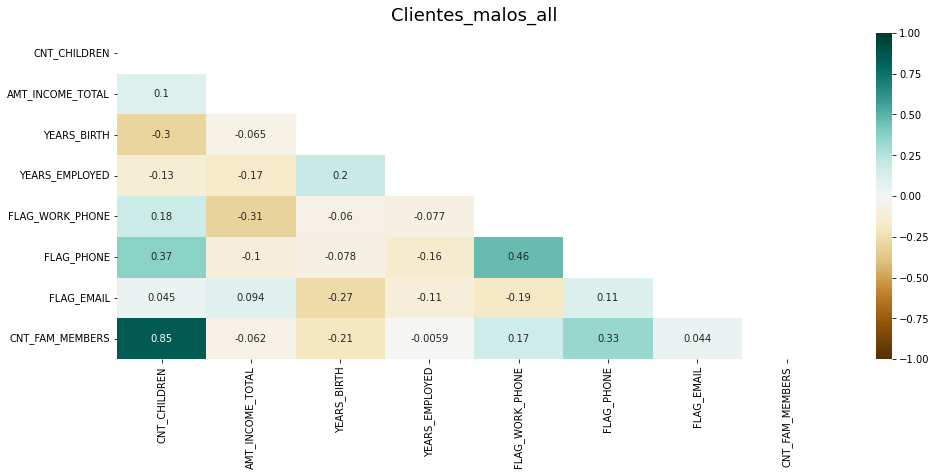

In [36]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_clientes_malos_str, dtype=np.bool))
heatmap = sns.heatmap(df_clientes_malos_str, mask= mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Clientes_malos_all', fontdict={'fontsize':18}, pad=12);

plt.savefig('Clientes_malos_all.png', dpi=300, bbox_inches='tight')
pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Clientes_malos_all.png'
pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/corr_rel/Clientes_malos_all.png'
shutil.move(pos1,pos2)

/var/folders/v1/3g8467xs4vvf3w4gs3sqq6qr0000gn/T/ipykernel_13510/150855513.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_clientes_vip_str, dtype=np.bool))


'/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/corr_rel/Clientes_VIP_all.png'

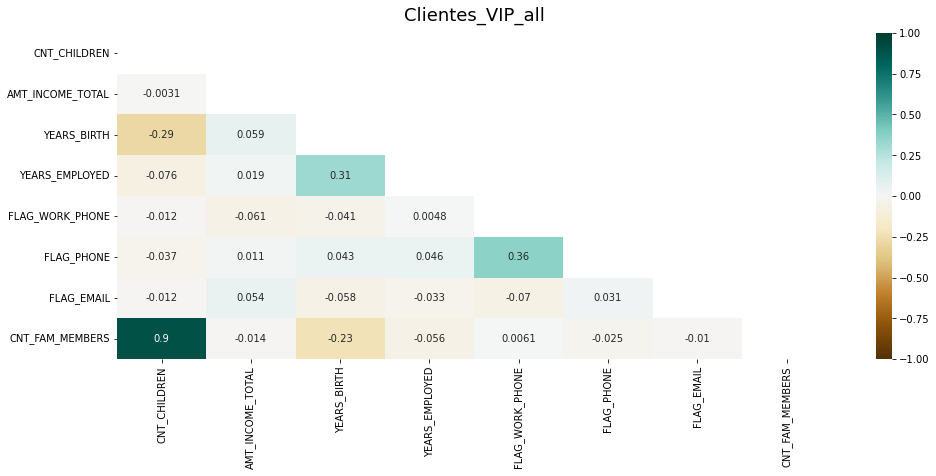

In [37]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_clientes_vip_str, dtype=np.bool))
heatmap = sns.heatmap(df_clientes_vip_str, mask= mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Clientes_VIP_all', fontdict={'fontsize':18}, pad=12);

plt.savefig('Clientes_VIP_all.png', dpi=300, bbox_inches='tight')
pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Clientes_VIP_all.png'
pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/corr_rel/Clientes_VIP_all.png'
shutil.move(pos1,pos2)


/var/folders/v1/3g8467xs4vvf3w4gs3sqq6qr0000gn/T/ipykernel_13510/3129796830.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_clientes_regulares_str, dtype=np.bool))


'/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/corr_rel/Clientes_regulares_all.png'

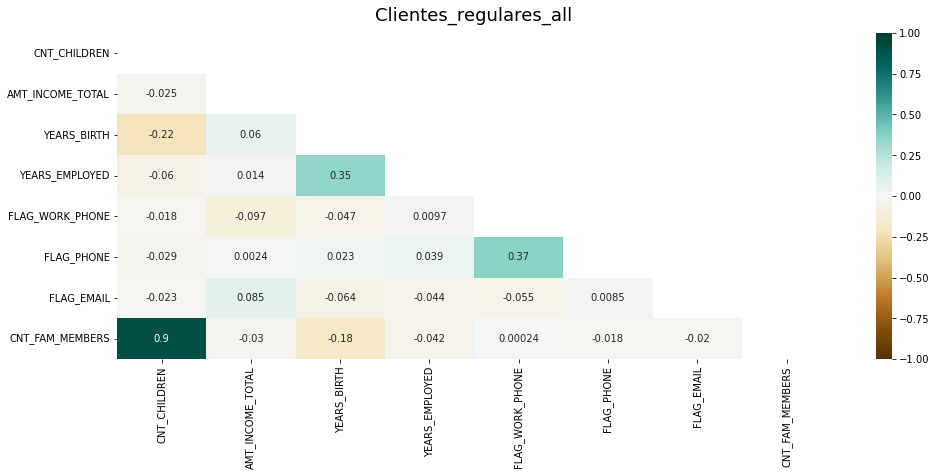

In [38]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_clientes_regulares_str, dtype=np.bool))
heatmap = sns.heatmap(df_clientes_regulares_str, mask= mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Clientes_regulares_all', fontdict={'fontsize':18}, pad=12);

plt.savefig('Clientes_regulares_all.png', dpi=300, bbox_inches='tight')
pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Clientes_regulares_all.png'
pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/corr_rel/Clientes_regulares_all.png'
shutil.move(pos1,pos2)

'/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/corr_rel/Correlación_AMT_INCOME_TOTAL_VIP_all.png'

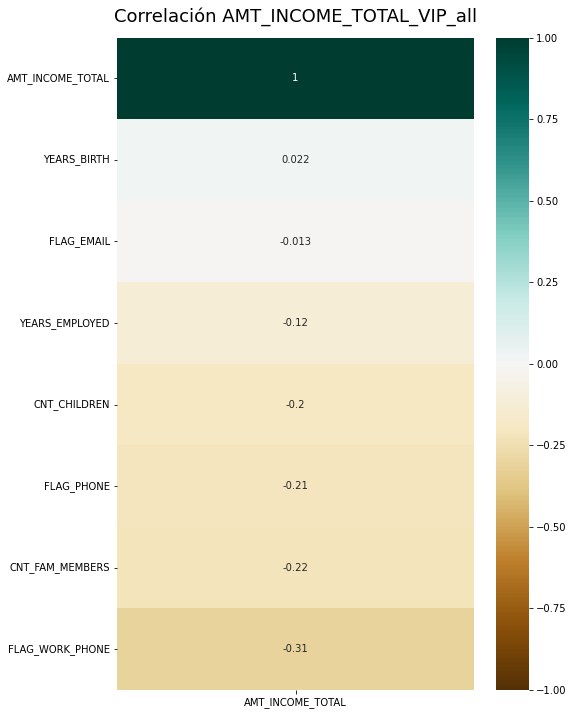

In [39]:
# Correlación por ingresos con strings

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_clientes_vip_str.corr()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación AMT_INCOME_TOTAL_VIP_all', fontdict={'fontsize':18}, pad=16)

plt.savefig('Correlación_AMT_INCOME_TOTAL_VIP_all.png', dpi=300, bbox_inches='tight')
pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Correlación_AMT_INCOME_TOTAL_VIP_all.png'
pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/corr_rel/Correlación_AMT_INCOME_TOTAL_VIP_all.png'
shutil.move(pos1,pos2)

'/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/corr_rel/Correlación_AMT_INCOME_TOTAL_malos_all.png'

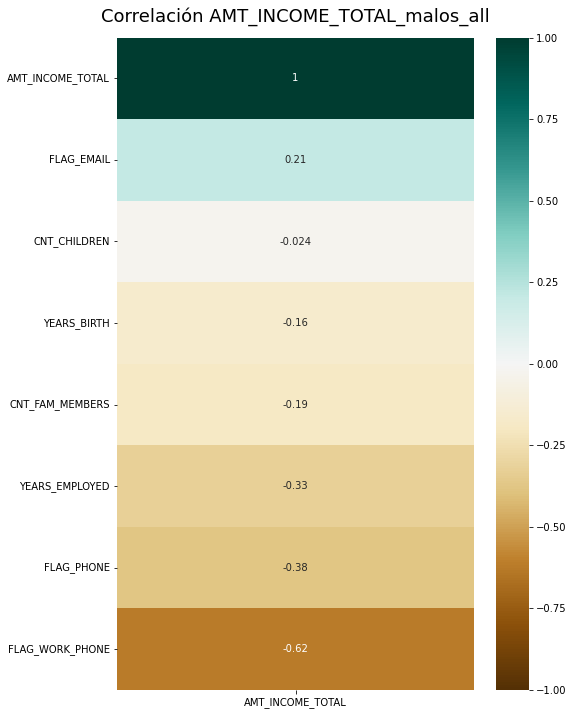

In [40]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_clientes_malos_str.corr()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación AMT_INCOME_TOTAL_malos_all', fontdict={'fontsize':18}, pad=16);

plt.savefig('Correlación_AMT_INCOME_TOTAL_malos_all.png', dpi=300, bbox_inches='tight')
pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Correlación_AMT_INCOME_TOTAL_malos_all.png'
pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/corr_rel/Correlación_AMT_INCOME_TOTAL_malos_all.png'
shutil.move(pos1,pos2)